In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np
import numpy.linalg as la

In [3]:
def add_relative_to_current_source_file_path_to_sys_path(relpath):
    import os, sys, inspect
    path = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile(inspect.currentframe()))[0],relpath)))
    if path not in sys.path:
        sys.path.insert(0,path)

add_relative_to_current_source_file_path_to_sys_path("../../shims/toric")   

import toric
import toric.samples
import toric.shims

#
# Helper functions for the toric libary
#

def vector3_to_str(v):
    return "(%.2f, %.2f, %.2f)" % (v.x(), v.y(), v.z())

def quaternion_to_str(q):
    return "(w,x,y,z): (%.2f, %.2f, %.2f, %.2f)" % (q.w(), q.x(), q.y(), q.z())

def vector3_to_np3(v):
    return np.array([v.x(),v.y(),v.z()])

def np3_to_vector3(v):
    return toric.Vector3(v[0],v[1],v[2])

def slerp(p0, p1, t):
        omega = np.arccos(np.dot(p0/np.linalg.norm(p0), p1/np.linalg.norm(p1)))
        so = np.sin(omega)
        return np.sin((1.0-t)*omega) / so * p0 + np.sin(t*omega)/so * p1

def drawSetup(fudgeX=2, fudgeY_pos=2,fudgeY_neg=8):
    pylab.rcParams['figure.figsize'] = 8, 8

    plt.axes().set_aspect('equal')
    fig = plt.gcf()
    
    # Set up plot size
    plt.axes().set_xlim((np.min([PA_1.x(), PB_1.x()])-fudgeX,np.max([PA_1.x(), PB_1.x()])+fudgeX))
    plt.axes().set_ylim((np.min([PA_1.y(), PB_1.y()])-fudgeY_neg,np.max([PA_1.y(), PB_1.y()])+fudgeY_pos))

    # Draw People Positions
    plt.scatter([PA_1.x(), PB_1.x()],[PA_1.y(), PB_1.y()],c="red",linewidths=0)
    line_AB = plt.Line2D([PA_1.x(), PB_1.x()],[PA_1.y(), PB_1.y()], c="black",alpha=0.3)
    fig.gca().add_artist(line_AB)

    # Draw Circles    
    circle_PA_1=plt.Circle((PA_1.x(),PA_1.y()),min_dist,color='g',alpha=0.5)
    circle_PB_1=plt.Circle((PB_1.x(),PB_1.y()),min_dist,color='g',alpha=0.5)
    
    fig.gca().add_artist(circle_PA_1)
    fig.gca().add_artist(circle_PB_1)

    plt.annotate(s="A", xy=(PA_1.x(),PA_1.y()),xytext=(3,4),textcoords="offset points")
    plt.annotate(s="B", xy=(PB_1.x(),PB_1.y()),xytext=(3,4),textcoords="offset points")
    
    # Draw Camera positions
    plt.scatter([C_1.x(), C_2.x()],[C_1.y(), C_2.y()],c="blue",linewidths=0)
    plt.annotate(s="C1", xy=(C_1.x(), C_1.y()),xytext=(3,4),textcoords="offset points")
    plt.annotate(s="C2", xy=(C_2.x(), C_2.y()),xytext=(3,4),textcoords="offset points")

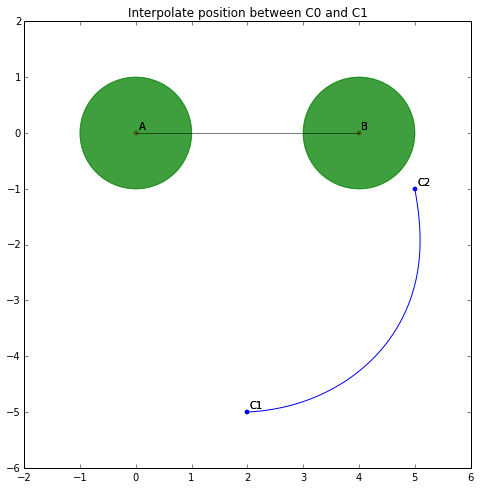

In [4]:
min_dist = 1                    # let's set a minimum distance of 1m
PA_1 = toric.Vector3(0,0,0)     # person A position
PB_1 = toric.Vector3(4,0,0)     # person B position
C_1 = toric.Vector3(2,-5,0)     # Starting camera position is *outside* of PA_1
C_2 = toric.Vector3( 5,-1,0)    # Ending camera position

drawSetup(fudgeY_neg=2)
plt.title("Interpolate position between C0 and C1")

C_1t = toric.Toric3_FromWorldPosition(C_1, PA_1, PB_1)
C_2t = toric.Toric3_FromWorldPosition(C_2, PA_1, PB_1)

interp = toric.ToricInterpolator(PA_1, PB_1, C_1t, C_2t)

t = np.linspace(0,1)

sigma = np.array([toric.Toric3_ToWorldPosition(interp.interpolate(a),PA_1,PB_1).np() for a in t])

drawSetup(fudgeY_neg=6)
plt.plot(sigma[:,0],sigma[:,1])

fovX:  1.7521161012
fovY:  0.985565306923
rotation 1 axes:  (1.00, 0.00, 0.00)
(1.00, 0.00, 0.00)
(0.00, 1.00, 0.00)
(0.00, 0.00, 1.00)
v:  (0.00, 0.00, 0.00)
(w,x,y,z): (1.00, 0.00, 0.00, 0.00)
rotation 2 axes: 
(0.47, 0.88, 0.00)
(-0.88, 0.47, 0.00)
(0.00, 0.00, 1.00)
v:  (0.00, 0.00, 0.51)
(w,x,y,z): (0.86, 0.00, 0.00, 0.51)


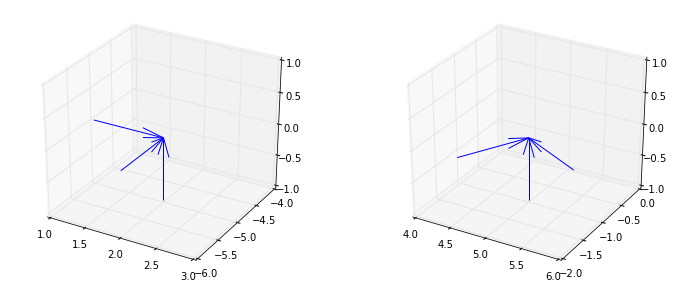

In [6]:
aspect = 16./9

SA_1 = toric.Vector2(-0.33, 0)#toric.Vector2(0.33, 0.5)
SB_1 = toric.Vector2(0.33, 0)#toric.Vector2(0.66, 0.5)
fovX_1 = toric.RadianPi(2 * np.arctan(6./5)) # geometrically calculated by hand
fovY_1 = toric.RadianPi(fovX_1.valueRadians() / aspect)

print "fovX: ", fovX_1.valueRadians()
print "fovY: ", fovY_1.valueRadians()

SA_2 = toric.Vector2(-0.33, 0.33)
SB_2 = toric.Vector2(0.4, 0)
fovX_2 = fovX_1
fovY_2 = fovY_1

rotation_1 = toric.Toric3_ComputeOrientationForTwoTargets(C_1, SA_1, SB_1, PA_1, PB_1, fovX_1, fovY_1)
rotation_2 = toric.Toric3_ComputeOrientationForTwoTargets(C_2, SA_1, SB_1, PA_1, PB_1, fovX_1, fovY_1)

matrix_1 = toric.Matrix3()
rotation_1.ToRotationMatrix(matrix_1)
print "rotation 1 axes: ", matrix_1.getColumn(0)
print rotation_1.xAxis()
print matrix_1.getColumn(1)
print matrix_1.getColumn(2)

print "v: ", rotation_1.v()
print quaternion_to_str(rotation_1)

print "rotation 2 axes: "
print rotation_2.xAxis()
print rotation_2.yAxis()
print rotation_2.zAxis()

print "v: ", rotation_2.v()
print quaternion_to_str(rotation_2)

#
# Graphing the rotation axes
#

from mpl_toolkits.mplot3d import Axes3D
pylab.rcParams['figure.figsize'] = 12, 16
from matplotlib import gridspec

gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1,1])
fig = plt.figure()
f1 = fig.add_subplot(gs[0], projection='3d')
f2 = fig.add_subplot(gs[1], projection='3d')

soa_1 = np.array( [[C_1.x(), C_1.y(), C_1.z(), rotation_1.xAxis().x(), rotation_1.xAxis().y(), rotation_1.xAxis().z()], 
                   [C_1.x(), C_1.y(), C_1.z(), rotation_1.yAxis().x(), rotation_1.yAxis().y(), rotation_1.yAxis().z()],
                   [C_1.x(), C_1.y(), C_1.z(), rotation_1.zAxis().x(), rotation_1.zAxis().y(), rotation_1.zAxis().z()]]) 

X_1,Y_1,Z_1,U_1,V_1,W_1 = zip(*soa_1)
f1.quiver(X_1,Y_1,Z_1,U_1,V_1,W_1)

f1.set_xlim([C_1.x()-1,C_1.x()+1])
f1.set_ylim([C_1.y()-1,C_1.y()+1])
f1.set_zlim([C_1.z()-1,C_1.z()+1])

soa_2 = np.array( [[C_2.x(), C_2.y(), C_2.z(), rotation_2.xAxis().x(), rotation_2.xAxis().y(), rotation_2.xAxis().z()], 
                   [C_2.x(), C_2.y(), C_2.z(), rotation_2.yAxis().x(), rotation_2.yAxis().y(), rotation_2.yAxis().z()],
                   [C_2.x(), C_2.y(), C_2.z(), rotation_2.zAxis().x(), rotation_2.zAxis().y(), rotation_2.zAxis().z()]]) 

X_2,Y_2,Z_2,U_2,V_2,W_2 = zip(*soa_2)
f2.quiver(X_2,Y_2,Z_2,U_2,V_2,W_2)

f2.set_xlim([C_2.x()-1,C_2.x()+1])
f2.set_ylim([C_2.y()-1,C_2.y()+1])
f2.set_zlim([C_2.z()-1,C_2.z()+1])

plt.show()

(w,x,y,z): (1.00, 0.00, 0.00, 0.00)
(0.00, 0.00, 0.00)
theta_1:  0.0
n_1:  [ nan  nan  nan]
theta_2:  1.07939946517
n_2:  [ 0.  0.  1.]


/Users/ejane/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


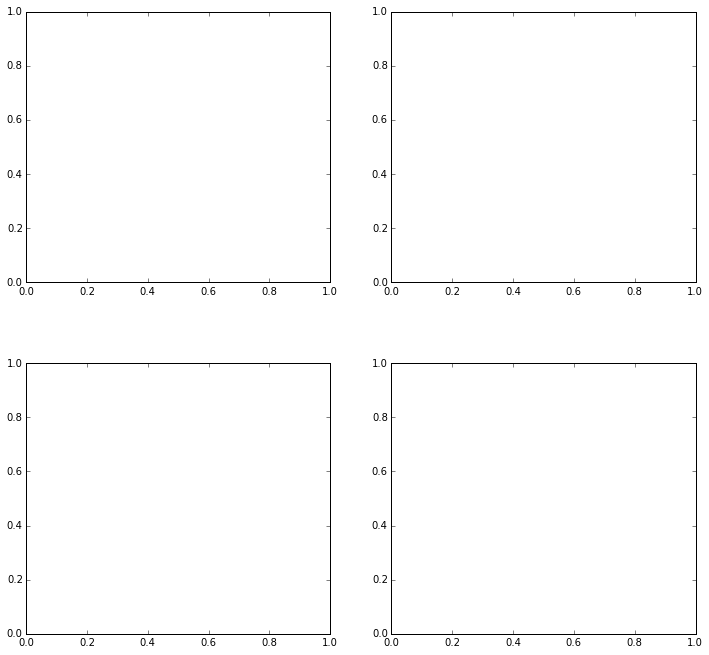

In [15]:
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1,1])
fig = plt.figure()
f1 = fig.add_subplot(gs[0])
f2 = fig.add_subplot(gs[1])
f3 = fig.add_subplot(gs[2])
f4 = fig.add_subplot(gs[3])

print quaternion_to_str(rotation_1)
print vector3_to_str(rotation_1.v())
#print rotation_1.s()

theta_1 = 2 * np.arccos(rotation_1.w())
n_1 = vector3_to_np3(rotation_1.v()) / np.sin(theta_1/2)
print "theta_1: ", theta_1
print "n_1: ", n_1

theta_2 = 2 * np.arccos(rotation_2.w())
n_2 = vector3_to_np3(rotation_2.v()) / np.sin(theta_2/2)
print "theta_2: ", theta_2
print "n_2: ", n_2